##### Attribute Information:
##### Bank client data:

Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

##### Related with the last contact of the current campaign:

Contact: contact communication type (categorical:
'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')

Dayofweek: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.

##### Other attributes:

Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)

Previous: number of contacts performed before this campaign and for
this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

##### Social and economic context attributes
Emp.var.rate: employment variation rate - quarterly indicator
(numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('bank.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

##### EDA & Data Visualisation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [7]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [8]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [9]:
data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

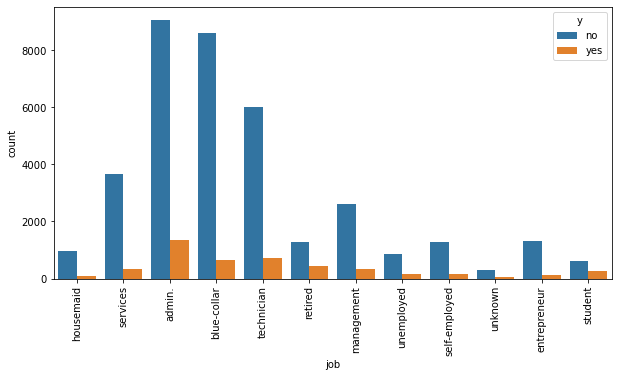

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data['job'],hue=data['y'])
plt.xticks(rotation=90);

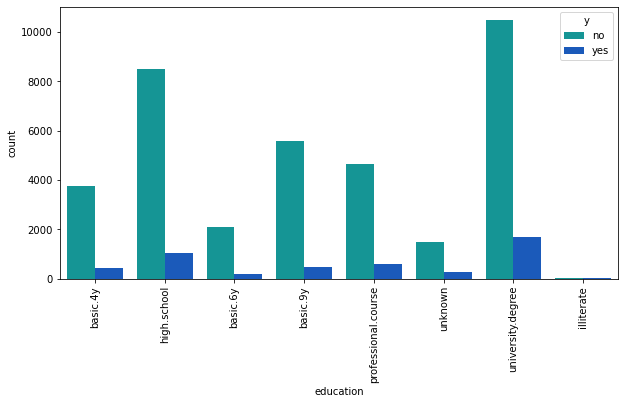

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data['education'],hue=data['y'],palette='winter_r')
plt.xticks(rotation=90);

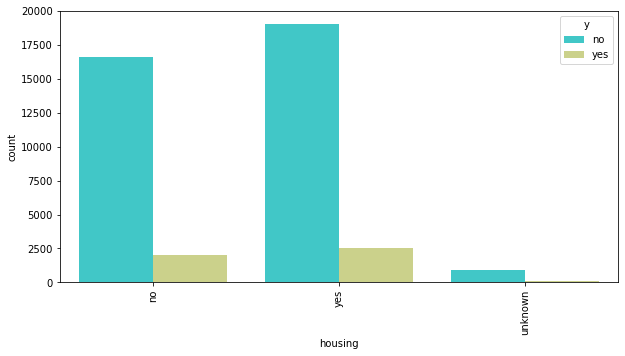

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data['housing'],hue=data['y'],palette='rainbow')
plt.xticks(rotation=90);

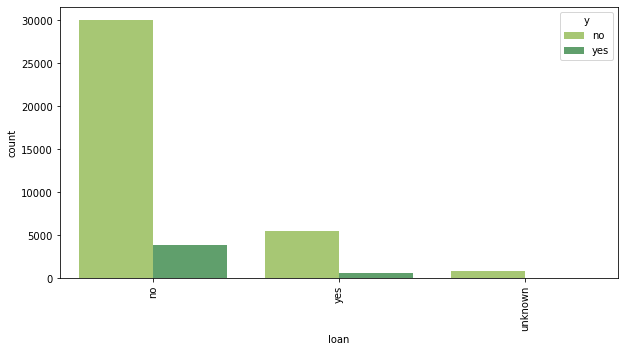

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data['loan'],hue=data['y'],palette='summer_r')
plt.xticks(rotation=90);

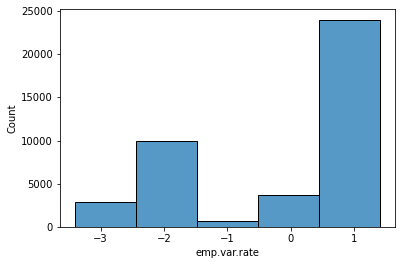

In [14]:
sns.histplot(data['emp.var.rate'],bins=5);

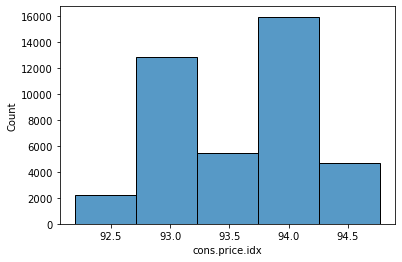

In [15]:
sns.histplot(data['cons.price.idx'],bins=5);

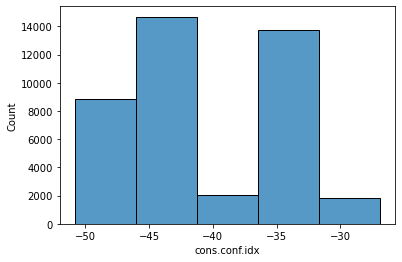

In [16]:
sns.histplot(data['cons.conf.idx'],bins=5);

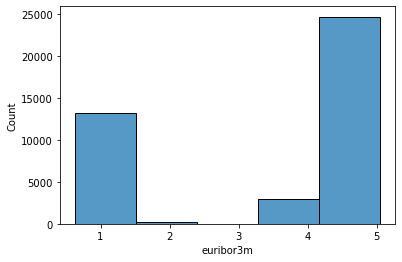

In [17]:
sns.histplot(data['euribor3m'],bins=5);

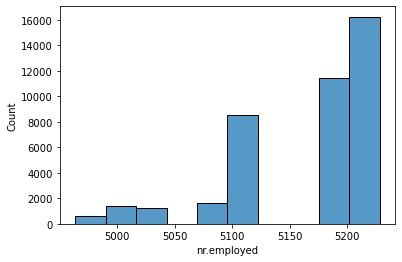

In [18]:
sns.histplot(data['nr.employed'],bins=10);

<AxesSubplot:xlabel='y', ylabel='count'>

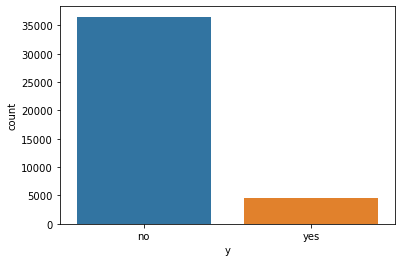

In [19]:
sns.countplot(data['y'])

In [22]:
X=data.drop(['y'],axis=1)

In [23]:
X=pd.get_dummies(X)

In [24]:
y=data['y']

##### Resampling

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
X, y = SMOTE().fit_resample(X,y)

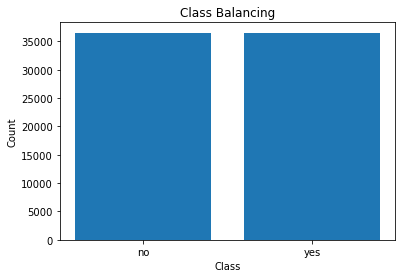

In [27]:
y_un,count = np.unique(y,return_counts=True)
plt.title("Class Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.bar([str(i) for i in y_un],count)
plt.show()

##### Data Preprocessing

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [32]:
X_train=scaler.fit_transform(X_train)

In [33]:
X_test=scaler.transform(X_test)

###### Data Modelling

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [35]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [36]:
knc_model=KNeighborsClassifier()
knc_model.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [39]:
ada_model=AdaBoostClassifier()
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

###### Comparing the models to find the best fit model

In [40]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [41]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

          no       0.97      0.93      0.95     11383
         yes       0.93      0.97      0.95     10546

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



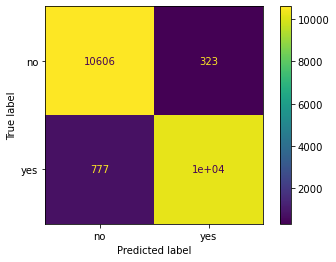

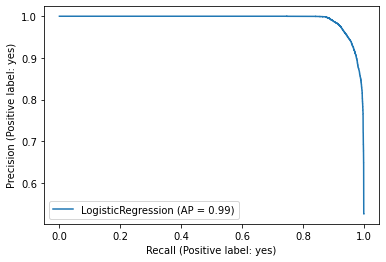

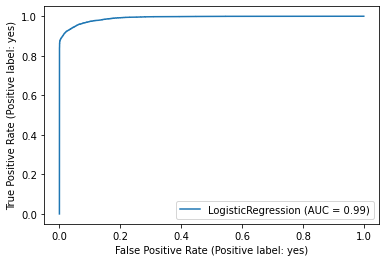

In [42]:
print("LOGISTIC REGRESSION MODEL")
report(log_model)

KNEIGHBORS CLASSIFIER MODEL
              precision    recall  f1-score   support

          no       0.96      0.92      0.94     11334
         yes       0.92      0.96      0.94     10595

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929



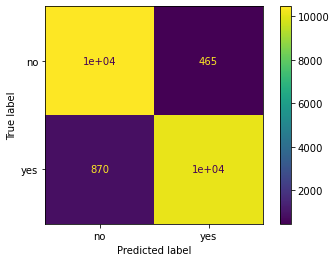

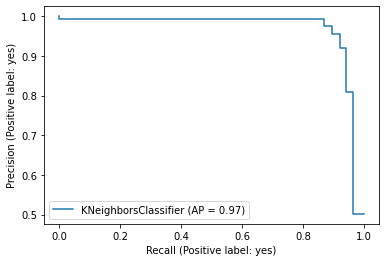

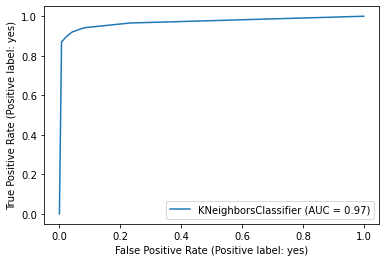

In [43]:
print("KNEIGHBORS CLASSIFIER MODEL")
report(knc_model)

RANDOM FOREST CLASSIFIER MODEL
              precision    recall  f1-score   support

          no       0.96      0.95      0.95     11036
         yes       0.95      0.96      0.95     10893

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



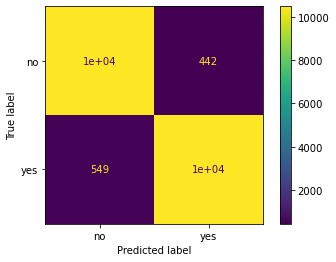

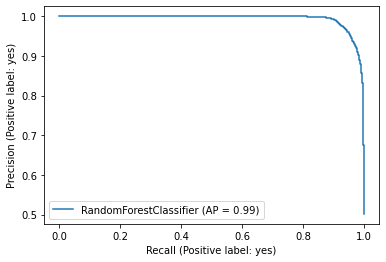

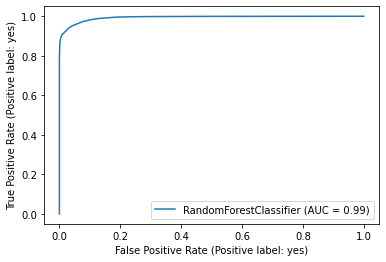

In [44]:
print("RANDOM FOREST CLASSIFIER MODEL")
report(rfc_model)

GRADIENT BOOSTING CLASSIFIER MODEL
              precision    recall  f1-score   support

          no       0.94      0.95      0.94     10770
         yes       0.95      0.94      0.95     11159

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



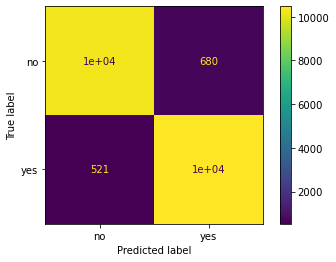

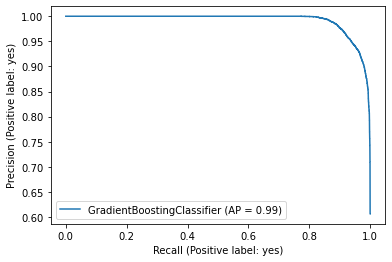

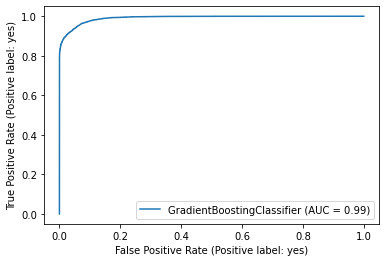

In [45]:
print("GRADIENT BOOSTING CLASSIFIER MODEL")
report(gbc_model)

ADA BOOST CLASSIFIER MODEL
              precision    recall  f1-score   support

          no       0.95      0.93      0.94     11098
         yes       0.93      0.95      0.94     10831

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929



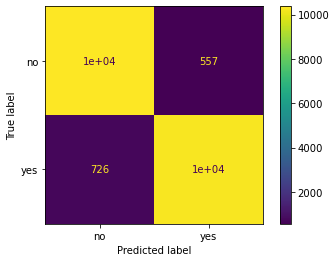

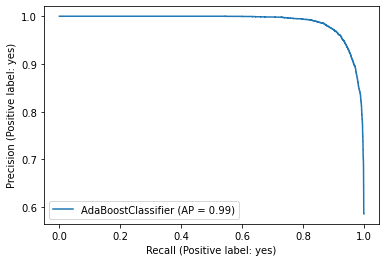

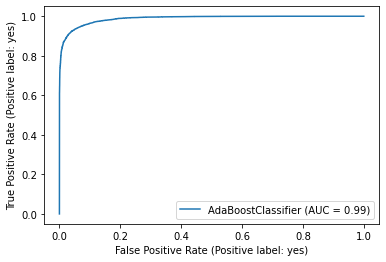

In [46]:
print("ADA BOOST CLASSIFIER MODEL")
report(ada_model)